In [1]:
import os
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib notebook

Loading data

In [100]:
data_file = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-18813/testing_fitting/file1.txt'
assert os.path.exists(data_file)

In [101]:
_data = pd.read_csv(data_file, names=['pixel','counts'], comment='#')
_data.head()

,pixel,counts
0,1179,953145.0
1,1180,947835.0
2,1181,937148.0
3,1182,923393.0
4,1183,909089.0


In [114]:
#xdata = np.array(_data['pixel'])
ydata = np.array(_data['counts'])
xdata = np.arange(len(ydata))

ydata=ydata[::-1]

<IPython.core.display.Javascript object>


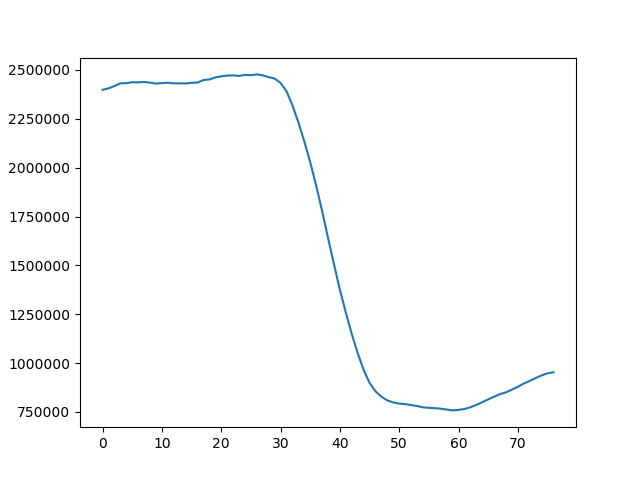

/Users/j35/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [115]:
plt.figure(0)
plt.plot(xdata, ydata)
plt.legend()

fitting

In [116]:
def func(x, c, w, n, m):
    return (m-n)*((scipy.special.erf((x-c)/w))/2.)+0.5*(n+m)

def fit(xdata, ydata):
    popt, pcov = curve_fit(func, xdata, ydata, maxfev=3000)
    return popt

In [117]:
popt = fit(xdata, ydata)
print(popt)

[3.80749239e+01 6.22562546e+00 2.44778922e+06 8.21719388e+05]


<IPython.core.display.Javascript object>


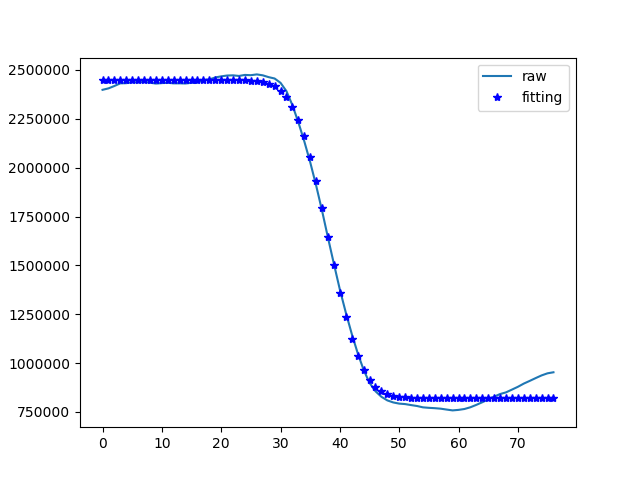

In [118]:
plt.figure(1)
plt.plot(xdata, ydata, label='raw')
y_fit = func(xdata, popt[0], popt[1], popt[2], popt[3])
plt.plot(xdata, y_fit, 'b*', label='fitting')
plt.legend()

In [112]:
b = popt[0] + (popt[1]/np.sqrt(2))

In [113]:
b

-11.53459245327064